In [56]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [57]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


## multivariate normality

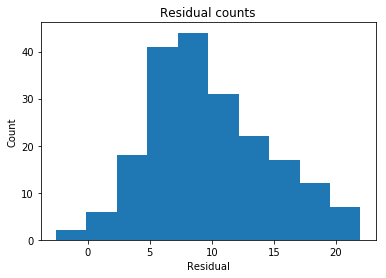

In [79]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

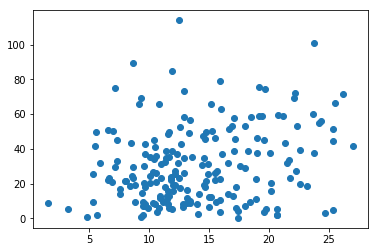

In [76]:
plt.scatter(data['Sales'], data['Newspaper'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

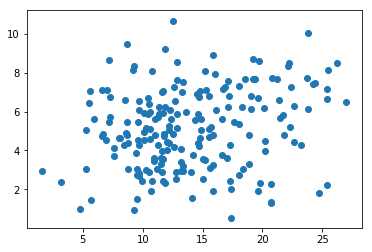

In [78]:
data['News_sqrt'] = np.sqrt(data['Newspaper'])

plt.scatter(data['Sales'], data['News_sqrt'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

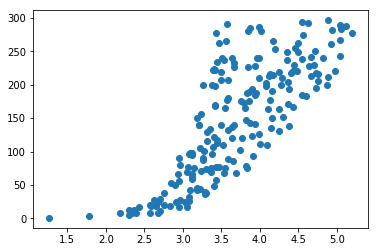

In [62]:


plt.scatter(data['Sales'], data['TV'])
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.show()

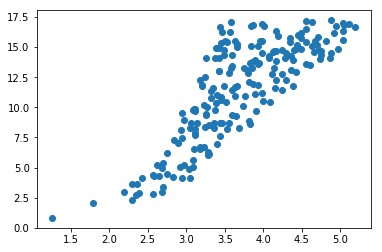

In [63]:
data['TV_f'] = np.sqrt(data['TV'])

plt.scatter(data['Sales'], data['TV_f'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

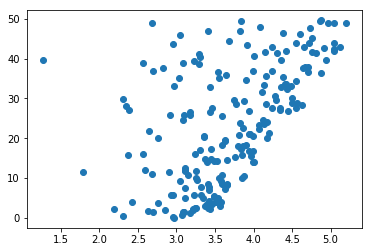

In [64]:
plt.scatter(data['Sales'], data['Radio'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

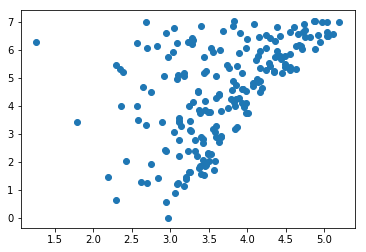

In [65]:
data['Radio_f'] = np.sqrt(data['Radio'])

plt.scatter(data['Sales'], data['Radio_f'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

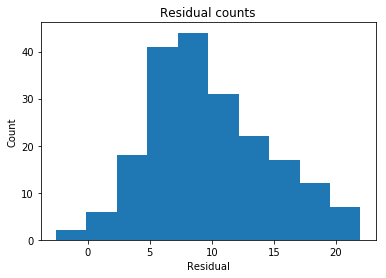

In [72]:
X = data[['TV_f','Radio_f','News_sqrt']]

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']


# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## homoscedasticity

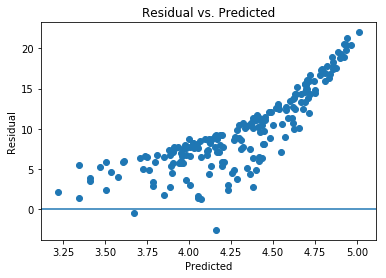

In [80]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## multicollinearity

In [82]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV_f,Radio_f,News_sqrt
TV_f,1.000,0.040,0.042
Radio_f,0.040,1.000,0.294
News_sqrt,0.042,0.294,1.000


Square rooting our independent variables showed the best results in homoscedasticity and multivariate normality